In [689]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy as np
import skimage as sk
import skimage.io as skio
import skimage.viewer.utils as utils
import skimage.transform
import skimage

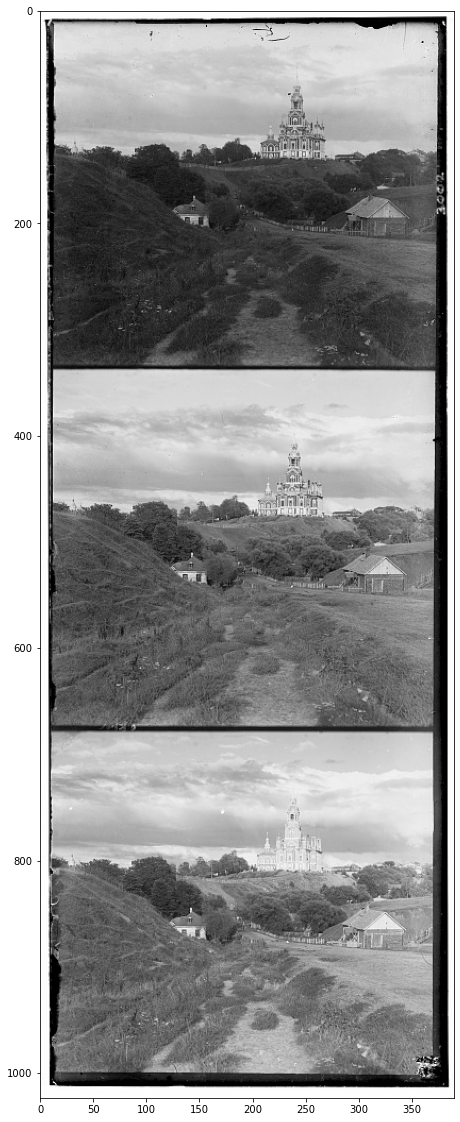

Size (3, 3) Incremental Shift (0, 0)
Size (8, 9) Incremental Shift (0, 0)
Size (23, 26) Incremental Shift (0, 0)
Size (68, 78) Incremental Shift (-1, -1)
Size (204, 234) Incremental Shift (-2, 1)
Blue shift -5 -2
Size (3, 3) Incremental Shift (0, 0)
Size (8, 9) Incremental Shift (0, 0)
Size (23, 26) Incremental Shift (0, 0)
Size (68, 78) Incremental Shift (2, 0)
Size (204, 234) Incremental Shift (1, 1)
Red shift 7 1


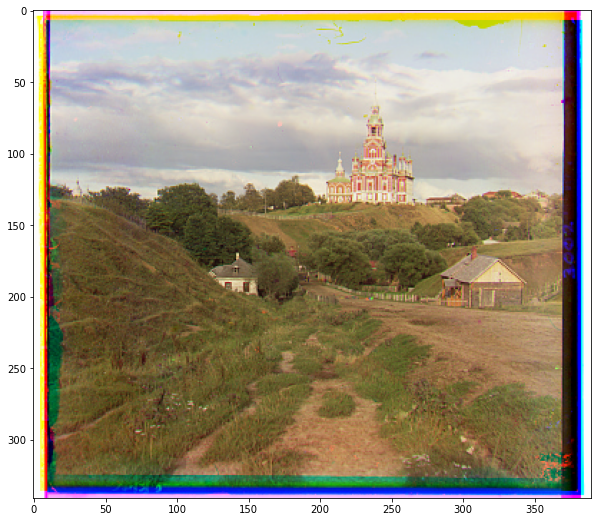

In [695]:
# name of the input file
imname = 'cathedral.jpeg'
img = skio.imread(imname)
plotgray(img)
img_aligned = align(imname,to_float=False,to_shrink=False)

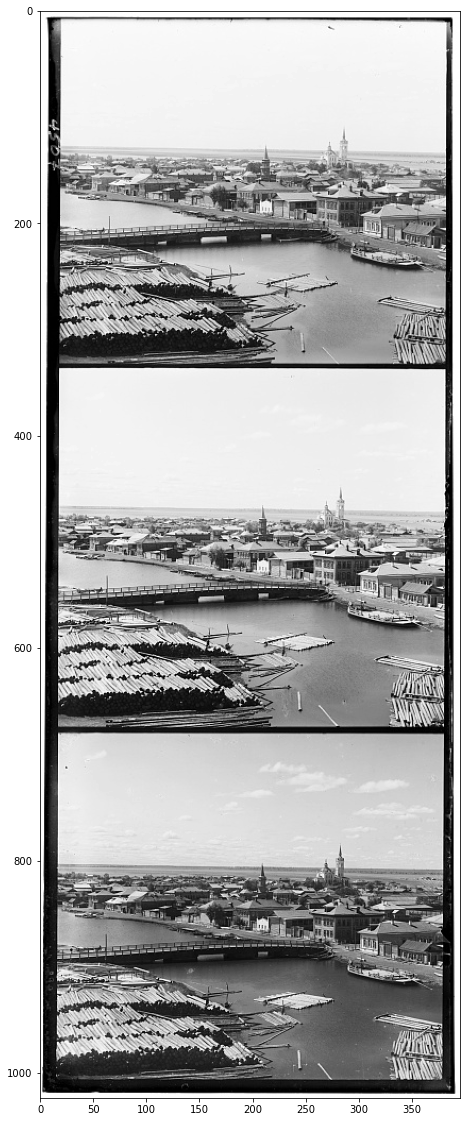

Size (3, 3) Incremental Shift (0, 0)
Size (8, 9) Incremental Shift (0, 0)
Size (23, 27) Incremental Shift (0, 0)
Size (68, 79) Incremental Shift (-1, -1)
Size (204, 237) Incremental Shift (0, 0)
Blue shift -3 -3
Size (3, 3) Incremental Shift (0, 0)
Size (8, 9) Incremental Shift (0, 0)
Size (23, 27) Incremental Shift (0, 0)
Size (68, 79) Incremental Shift (1, 0)
Size (204, 237) Incremental Shift (1, 1)
Red shift 4 1


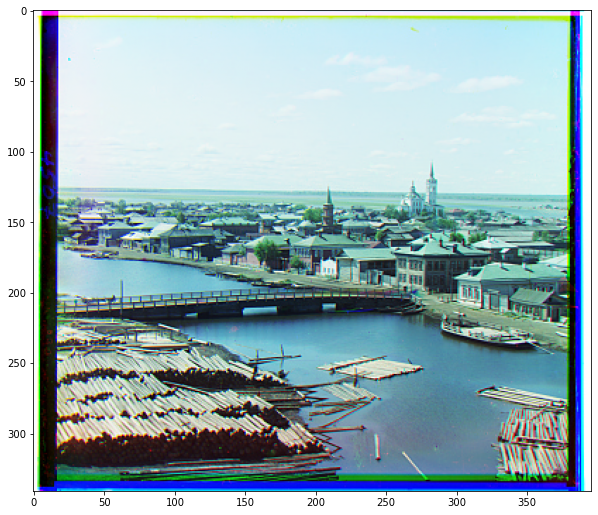

In [696]:
# name of the input file
imname = 'tobolsk.jpeg'
img = skio.imread(imname)
plotgray(img)
img_aligned = align(imname,to_float=True,to_shrink=False)

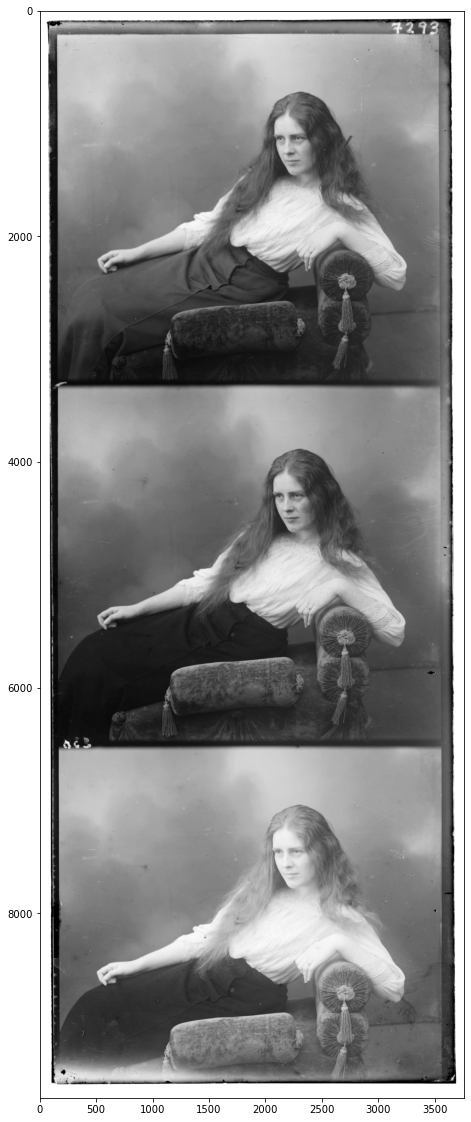

Size (3, 4) Incremental Shift (0, 0)
Size (8, 10) Incremental Shift (0, 0)
Size (24, 28) Incremental Shift (0, 0)
Size (72, 84) Incremental Shift (-2, 0)
Size (214, 251) Incremental Shift (1, -1)
Size (642, 753) Incremental Shift (-2, 0)
Blue shift -17 -3
Size (3, 4) Incremental Shift (0, 0)
Size (8, 10) Incremental Shift (0, 0)
Size (24, 28) Incremental Shift (1, 0)
Size (72, 84) Incremental Shift (-1, 0)
Size (214, 251) Incremental Shift (1, 0)
Size (642, 753) Incremental Shift (0, 1)
Red shift 21 1


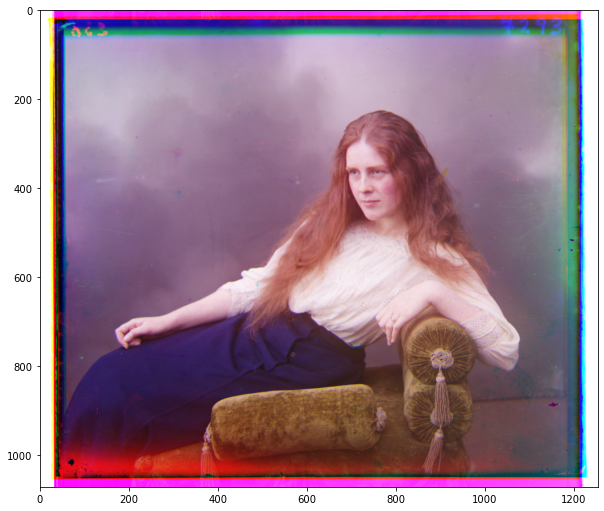

In [697]:
imname = 'lady.tif'
img = skio.imread(imname)
plotgray(img)
img_rgb = align(imname,to_float=True,to_shrink=True)

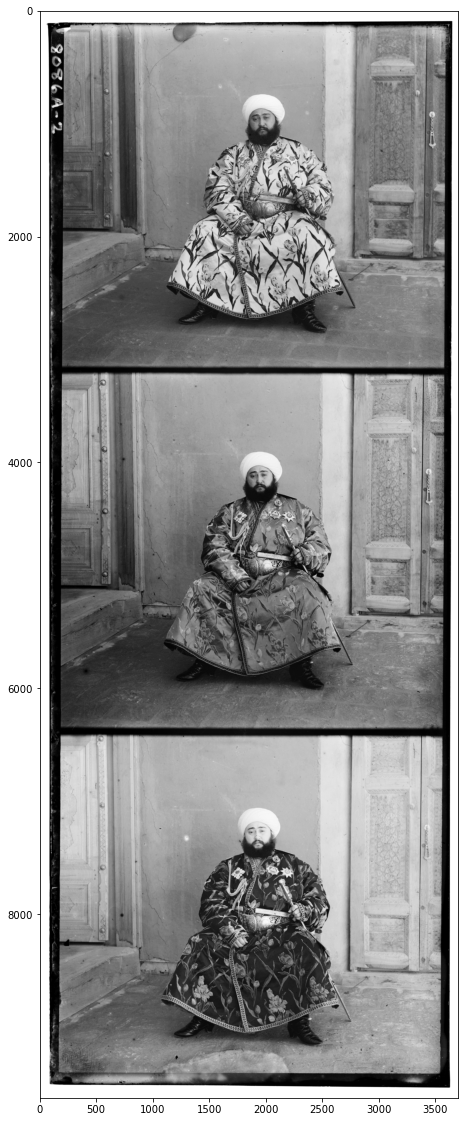

Size (3, 4) Incremental Shift (0, 0)
Size (8, 10) Incremental Shift (0, 0)
Size (24, 28) Incremental Shift (0, 0)
Size (72, 83) Incremental Shift (-2, -1)
Size (214, 247) Incremental Shift (1, 0)
Size (642, 741) Incremental Shift (0, 1)
Blue shift -15 -8
Size (3, 4) Incremental Shift (0, 0)
Size (8, 10) Incremental Shift (0, 0)
Size (24, 28) Incremental Shift (0, 0)
Size (72, 83) Incremental Shift (2, 1)
Size (214, 247) Incremental Shift (0, -1)
Size (642, 741) Incremental Shift (0, 0)
Red shift 18 6


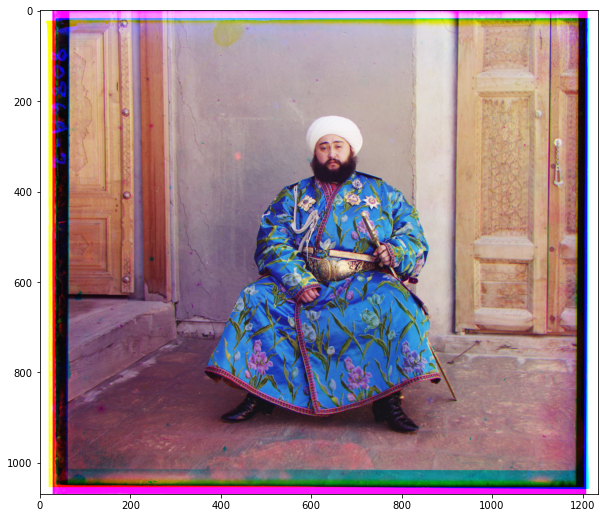

In [698]:
imname = 'emir.tif'
img = skio.imread(imname)
plotgray(img)
img_rgb = align(imname,to_float=True,to_shrink=True)

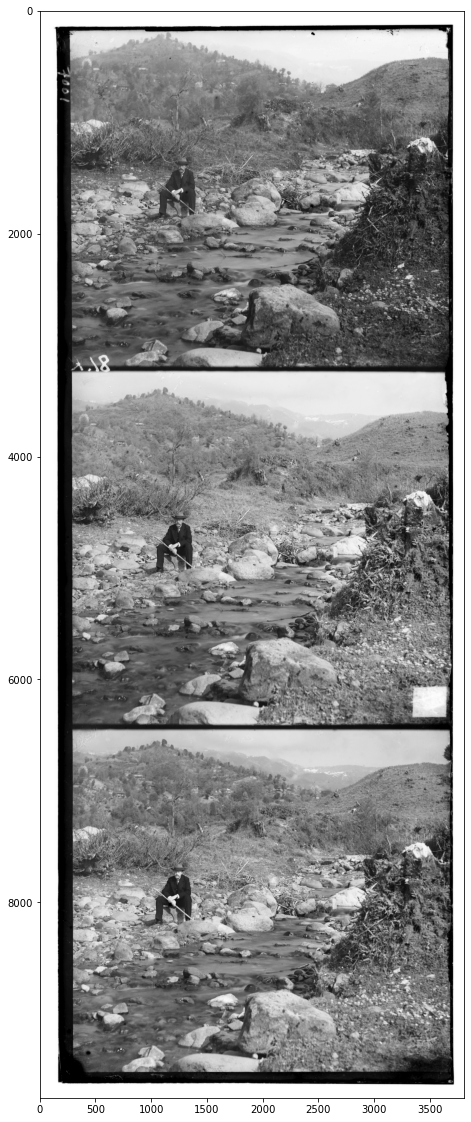

Size (3, 4) Incremental Shift (0, 0)
Size (9, 10) Incremental Shift (0, 0)
Size (25, 29) Incremental Shift (-1, 0)
Size (73, 85) Incremental Shift (0, -1)
Size (217, 254) Incremental Shift (0, 0)
Size (651, 762) Incremental Shift (0, -1)
Blue shift -27 -10
Size (3, 4) Incremental Shift (0, 0)
Size (9, 10) Incremental Shift (0, 0)
Size (25, 29) Incremental Shift (1, 0)
Size (73, 85) Incremental Shift (1, 0)
Size (217, 254) Incremental Shift (-1, 1)
Size (651, 762) Incremental Shift (0, 0)
Red shift 33 3


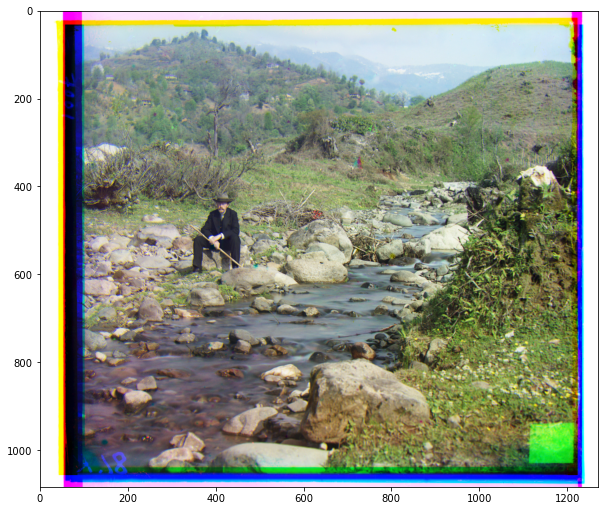

In [699]:
imname = 'self_portrait.tif'
img = skio.imread(imname)
plotgray(img)
img_rgb = align(imname,to_float=True,to_shrink=True)

### Main Function to align images

In [685]:
def align(imname,to_float=True,to_shrink=True):
    # read image and convert to 0-1 scaled float value
    img = skio.imread(imname)
    if to_float:
        img = skimage.img_as_float(img)
    # for big images, we shrink it
    if to_shrink or max(img.shape)>6000:
        img = shrink(img,3,gauss2D,pad=True)
    # deal with the smaller images instead
    h,w = img.shape[0]//3,img.shape[1]
    blue,green,red = img[:h],img[h:2*h],img[2*h:3*h]
    # crop the frame for better alignment
    b,g,r = crop_with_percent(blue),crop_with_percent(green),crop_with_percent(red)

    (dx,dy) = align_pyramids(b,g,ncc_mine,img_translate)
    print('Blue shift',dx,dy)
    shift_blue = img_translate(blue,dx,dy)

    (dx,dy) = align_pyramids(r,g,ncc_mine,img_translate)
    print('Red shift',dx,dy)
    shift_red = img_translate(red,dx,dy)

    img_rgb = np.dstack([shift_red,green,shift_blue])
    plot3ch(img_rgb)
    return img_rgb

In [690]:
########################
# Single Scale Version #
########################

import sys
import itertools
# Crops the borders of a given images by a constant factor
def crop_with_percent(img,ratio=0.4):
    h,w = img.shape
    return img[int(h*(ratio/2)):int(h*(1-ratio/2)), int(w*(ratio/2)):int(w*(1-ratio/2))]

# Tranlates with 'rolling padding'
def img_translate(img,dx,dy):
    result = np.roll(img,dx,axis=0)
    result = np.roll(result,dy,axis=1)
    return result

# Translate with constant 'padding' // can check on different mode for various padding methods
def img_translate_noroll(img,dx,dy):
    if dx>0:
        x_shift = np.pad(img,((dx,0),(0,0)),mode='constant')[:-dx]
    else:
        x_shift = np.pad(img,((0,-dx),(0,0)),mode='constant')[-dx:]
    if dy>0:
        result = np.pad(x_shift,((0,0),(dy,0)),mode='constant')[:,:-dy]
    else:
        result = np.pad(x_shift,((0,0),(0,-dy)),mode='constant')[:,-dy:]
    return result

# sum of square difference metric
def sum_of_square_diff(img_1,img_2):
    return np.sum((img_1-img_2)**2)

# cross correlation
def cross_corr(img_1,img_2):
    return -np.sum(img_1*img_2)

# NCC: measures similarity so uses (-1) to represent the distance
def ncc(img_1, img_2):
    n1 = img_1-np.mean(img_1)
    n2 = img_2-np.mean(img_2)
    n1 = n1 / np.sqrt(np.sum(n1)**2)
    n2 = n2 / np.sqrt(np.sum(n2**2))
    return cross_corr(n1,n2)

# NCC: measures similarity so uses (-1) to represent the distance
def ncc_mine(img_1, img_2):
    n1 = img_1 / np.sqrt(np.sum(img_1**2))
    n2 = img_2 / np.sqrt(np.sum(img_2**2))
    return cross_corr(n1,n2)


# Given two images, find the best displacement vector (dx,dy) such that the two image is best
# aligned, the distance is evaluated by the evaluation metrics
def best_alignment(img_to_shift, img_ref, metric, transform):
    # best alignment
    min_dist = sys.maxsize
    best_dx,best_dy = 0,0
    # set boundary on dx&dy
    dxbound = min(15,img_to_shift.shape[0]//2)
    dybound = min(15,img_to_shift.shape[1]//2)
    for dx,dy in itertools.product(range(-dxbound,dxbound+1),range(-dybound,dybound+1)):
        img = transform(img_to_shift,dx,dy)
        temp = metric(img,img_ref)
        if temp < min_dist:
            min_dist = temp
            best_dx,best_dy = dx,dy
    return best_dx,best_dy

# note that when using imshow, the float dype img and the ubyte version is equivalent
def plotgray(img,cmap='gray'):
    fig = plt.figure()
    fig.set_size_inches(10,20)
    plt.imshow(img, cmap=cmap)
    plt.show(fig)
def plot3ch(img):
    fig = plt.figure()
    fig.set_size_inches(10,20)
    plt.imshow(img)
    plt.show(fig)

In [691]:
############
# Pyramaid #
############
from skimage.transform import resize

def gauss2D(shape=(3,3),sigma=0.4):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def mean2D(shape=(3,3)):
    h = np.ones(shape)
    h /= h.sum()
    return h

## Pyramaid: each time shrink by shrink_ratio (addable Gaussian filter downsample)
def shrink(img,shrink_ratio,filter_func,pad=True):
    # crop the image so that h,w is divisible wrt shrink-ratio
    h,w = img.shape
    if pad:
        addh = (shrink_ratio-h%shrink_ratio)%shrink_ratio
        addw = (shrink_ratio-w%shrink_ratio)%shrink_ratio
        h,w = h+addh,w+addw
        img_crop = np.pad(img,[(addh,0),(addw,0)],mode='edge')
    else:
        h,w = h-h%shrink_ratio, w-w%shrink_ratio
        img_crop = img[:h,:w]
    # we seperate img into many small (shrink_ratio*shrink_ratio)-sized blocks
    rv,rh = h//shrink_ratio, w//shrink_ratio
    # vectorized split to r*c*blocks_r*blocks_c
    t1 = np.array(np.split(img_crop,rh,axis=1))
    t2 = np.array(np.split(t1,rv,axis=1))
    fm = filter_func(tuple([shrink_ratio]*2))
    broadcast_filter = fm[np.newaxis,np.newaxis,:]
    return np.sum(broadcast_filter*t2,axis=(2,3))

# get list of pyramaid images having shrinking image sizes
def get_pyramids(img, shrink_ratio, filter_func, pad=True):
    h,w = img.shape
    num_levels = min(int(np.log(h)/np.log(shrink_ratio)), int(np.log(w)/np.log(shrink_ratio)))
    pyrs = []
    pyrs.append(img)
    for i in range(num_levels):
        fine_img = pyrs[-1]
        coarse_img = shrink(fine_img,shrink_ratio,filter_func,pad)
        pyrs.append(coarse_img)
    return pyrs[::-1]

# Align with Pyramids method: we stop diving into features too small
def align_pyramids(img_to_shift, img_ref, metric, transform, shrink_ratio=3, max_side=1000, filter_func=mean2D):
    
    pyrs_to_shift = get_pyramids(img_to_shift,shrink_ratio,filter_func)
    pyrs_ref = get_pyramids(img_ref,shrink_ratio,filter_func)
    
    best_dx,best_dy=0,0
    
    for img_s,img_r in zip(pyrs_to_shift,pyrs_ref):
        if max(img_r.shape)>max_side:
            break
        # img size increses, thus shift size scales with ratio
        best_dx,best_dy=best_dx*shrink_ratio,best_dy*shrink_ratio
        # update shifted image according to current best shift size
        img_s = transform(img_s,best_dx,best_dy)
        # compute new-(INCREMENTAL)-shift  with finer image
        dx,dy = best_alignment(img_s,img_r,metric,transform)
        print('Size',img_r.shape,'Incremental Shift', (dx,dy))
        # compute new-shift
        best_dx,best_dy=best_dx+dx,best_dy+dy
    
    return best_dx,best_dy